### Student Information
Name:陳玟卉

Student ID:D1114242002

GitHub ID:

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

In [3]:
#The Data
import pandas as pd
import numpy as np
from sklearn.utils import Bunch

df = pd.read_csv('senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv')
df

sentiment                                            comment
0     not nostalgia  He was a singer with a golden voice that I lov...
1         nostalgia  The mist beautiful voice ever I listened to hi...
2         nostalgia  I have most of Mr. Reeves songs.  Always love ...
3     not nostalgia  30 day leave from 1st tour in Viet Nam to conv...
4         nostalgia  listening to his songs reminds me of my mum wh...
...             ...                                                ...
1495  not nostalgia  i don't know!..but the opening of the video,.....
1496  not nostalgia  it's sad this is such a beautiful song when yo...
1497  not nostalgia  Dear Friend, I think age and time is not that ...
1498      nostalgia  I was born in 1954 and started to be aware of ...
1499      nostalgia  This is the first CD I bought after my marriag...

[1500 rows x 2 columns]

In [4]:
#Data Preparation
categories = df['sentiment'].unique()

# Apply type conversion
df['sentiment'] = pd.Categorical(df['sentiment'], categories=categories)
df['sentiment'] = df['sentiment'].cat.codes

# Separate the features and labels
X = df['comment'].values  
y = df['sentiment'].values 

# Create a Bunch object from the dataframe
sentiment_train = Bunch(data=X, target=y, feature_names=['text'], target_names=categories)

In [5]:
sentiment_train.target_names

array(['not nostalgia', 'nostalgia'], dtype=object)

In [6]:
sentiment_train.target

array([0, 1, 1, ..., 0, 1, 1], dtype=int8)

In [7]:
sentiment_train

{'data': array(['He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life.',
        'The mist beautiful voice ever I listened to him when I was a kid and still love his singing Never forgotten The voice of an angel',
        'I have most of Mr. Reeves songs.  Always love his smooth voice, so comforting and sounds like the people I grew up around.  They were so gentle and sweet, but I had to leave my little town to find a job at age 17.  I graduated early.  I never forgot how great it was to grow up with simple people who had no pretensions -- just loving and gentle, like I think Jesus is.',
        ...,
        'Dear Friend, I think age and time is not that important when it comes to music. I am glad you like this song.',
        'I was born in 1954 and st

## 3. Data Transformation

In [6]:
#Converting Dictionary into Pandas Dataframe
import helpers.data_mining_helpers as dmh

X = pd.DataFrame.from_records(dmh.format_rows(sentiment_train), columns= ['text'])

### Adding Columns

In [8]:
X['category'] = sentiment_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, sentiment_train))

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [9]:
X

array(['He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life.',
       'The mist beautiful voice ever I listened to him when I was a kid and still love his singing Never forgotten The voice of an angel',
       'I have most of Mr. Reeves songs.  Always love his smooth voice, so comforting and sounds like the people I grew up around.  They were so gentle and sweet, but I had to leave my little town to find a job at age 17.  I graduated early.  I never forgot how great it was to grow up with simple people who had no pretensions -- just loving and gentle, like I think Jesus is.',
       ...,
       'Dear Friend, I think age and time is not that important when it comes to music. I am glad you like this song.',
       'I was born in 1954 and started to be aw

## 4. Data Mining using Pandas

In [9]:
#Missing Values
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text                            category  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                        category_name  
0  The amoung of missing records is:   
1                                   0

In [10]:
#Dealing with Duplicate Data
sum(X.duplicated())

1

In [11]:
len(X)

1500

In [12]:
X.drop_duplicates(keep="first", inplace=True) # inplace applies changes directly on our dataframe

In [13]:
len(X)

1499

In [14]:
sum(X.duplicated())

0

In [15]:
sum(X.duplicated('text'))

0

In [16]:
# 5. Data Preprocessing
X.category_name.value_counts()

category_name
nostalgia        750
not nostalgia    749
Name: count, dtype: int64

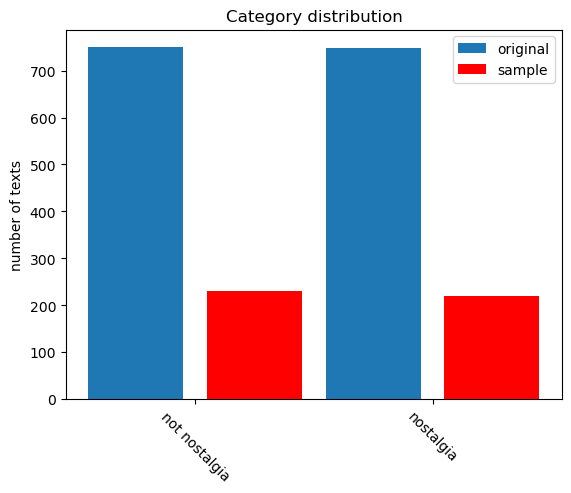

In [17]:
#Sampling
X_resampled = X.sample(n=450, )

# to draw category distributions for original and resampled data
import helpers.text_analysis as ta
ta.plot_category_distribution(X, X_resampled)

In [18]:
#Feature Creation
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('punkt')

ngram_range=(1,1) # (1, 2) for bi-gram, and so on

count_vectorizer = CountVectorizer(ngram_range=ngram_range)
tokenizer = count_vectorizer.build_analyzer() 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hylin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [19]:
tokenizer("I am craving for a hawaiian pizza right now") # sklearn's built-in tokenizer, slightly different from dmh.tokenize_text

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

In [20]:
dmh.tokenize_text("I am craving for a hawaiian pizza right now")

['I', 'am', 'craving', 'for', 'a', 'hawaiian', 'pizza', 'right', 'now']

In [10]:
X['unigrams'] = X['text'].apply(tokenizer)
list(X[0:1]['unigrams'])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

### 5.3 Feature subset selection

In [23]:
import helpers.data_mining_helpers as dmh

# In the helpers.data_mining_helpers package, I updated TA's function create_term_document_df
# to create a dataframe of term-document matrix from a series of texts
tdm_df = dmh.create_term_document_df(X['text'], count_vectorizer)
tdm_df

00  000  045  07  10  100  10m  11  11th  12  ...  yours  yourself  \
0      0    0    0   0   0    0    0   0     0   0  ...      0         0   
1      0    0    0   0   0    0    0   0     0   0  ...      0         0   
2      0    0    0   0   0    0    0   0     0   0  ...      0         0   
3      0    0    0   0   0    0    0   0     0   0  ...      0         0   
4      0    0    0   0   0    0    0   0     0   0  ...      0         0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...       ...   
1494   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1495   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1496   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1497   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1498   0    0    0   0   0    0    0   0     0   0  ...      0         0   

      youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
0         0         0        0    0    0    0        0      0  
1         0         0        0    0    0    0        0      0  
2         0         0        0    0    0    0        0      0  
3         0         0        0    0    0    0        0      0  
4         0         0        0    0    0    0        0      0  
...     ...       ...      ...  ...  ...  ...      ...    ...  
1494      0         0        0    0    0    0        0      0  
1495      0         0        0    0    0    0        0      0  
1496      0         0        0    0    0    0        0      0  
1497      0         0        0    0    0    0        0      0  
1498      0         0        0    0    0    0        0      0  

[1499 rows x 3730 columns]

In [24]:
import helpers.text_analysis as ta

# In the helpers.text_analysis package, I designed a function plot_paginated_heatmap
# to draw a heatmap for term-document matrix with pagination
ta.plot_paginated_heatmap(tdm_df, rows_per_page=50, cols_per_page=50)

interactive(children=(IntSlider(value=1, description='Document Page:', layout=Layout(align_self='center', heig…

### 5.4 Atrribute Transformation / Aggregation

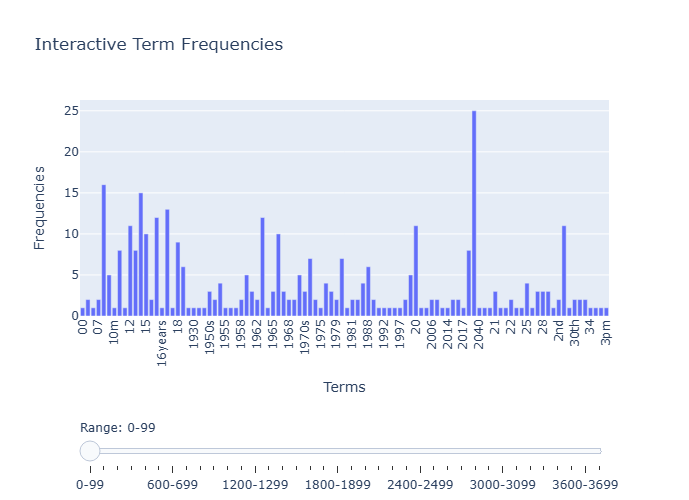

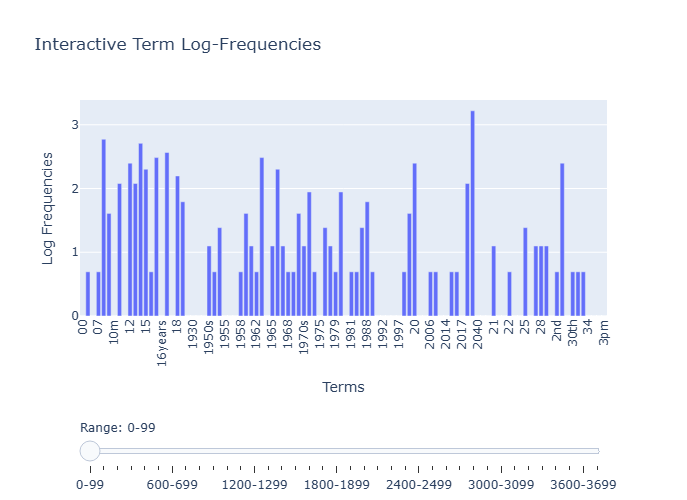

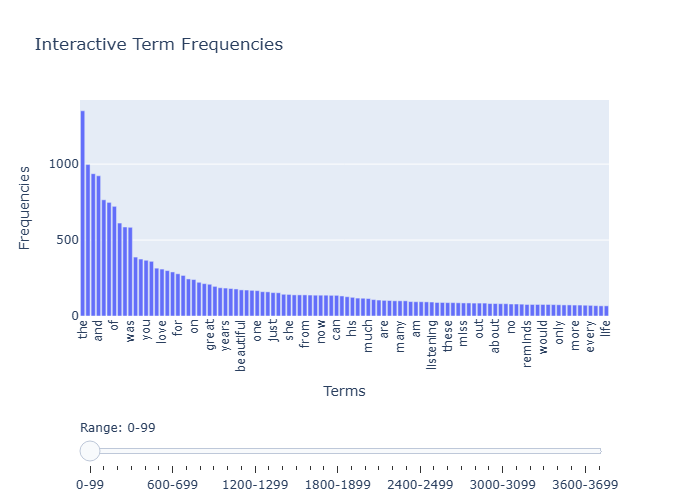

In [28]:
import helpers.text_analysis as ta

# In the helpers.text_analysis package, I designed a function plot_term_frequencies
# to draw a term frequencies with pagination, given a term-document matrix
ta.plot_term_frequencies(tdm_df, start_range=0, end_range=100, logScale=False, ascending=None)
ta.plot_term_frequencies(tdm_df, start_range=0, end_range=100, logScale=True, ascending=None)
ta.plot_term_frequencies(tdm_df, start_range=0, end_range=100, logScale=False, ascending=False)

### Finding frequent patterns for each category

#### Converting texts for each category to a term-document matrix

In [31]:
import pandas as pd

#Create separate DataFrames for each category
category_dfs = {}  # Dictionary to store DataFrames for each category
for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = X[X['category_name'] == category].copy()

# Create term-document frequency DataFrames for each category
term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category
for category in categories:
    term_document_dfs[category] = dmh.create_term_document_df(category_dfs[category]['text'])

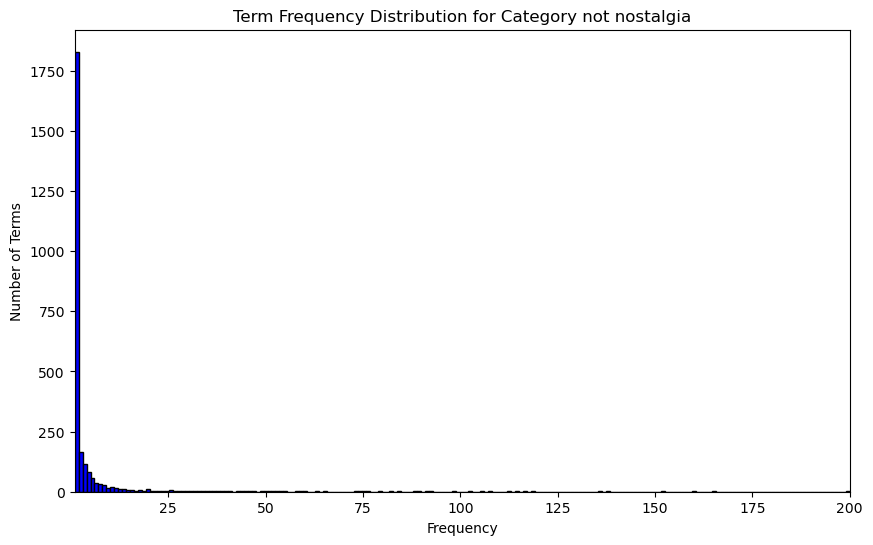

In [32]:
import matplotlib.pyplot as plt

category_number = 0
category_name = categories[category_number]
category_word_counts = term_document_dfs[category_name].sum(axis=0).to_numpy()

plt.figure(figsize=(10, 6))
plt.hist(category_word_counts, bins=700, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {category_name}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

#### Filtering the bottom 1% and top 5% words from the term-document matrix

In [33]:
# Apply the filtering function to each category texts
filt_term_document_dfs = {}
stop_words_dict = {} # collect those removed words as stop_words for CountVectorizer/TfidfVectorizer if necessary
for category in categories:
    # print(f'\nFor category {category} we filter the following words:')
    filt_term_document_dfs[category], stop_words_dict[category] = dmh.filter_top_bottom_words_by_sum(term_document_dfs[category], verbose=False)
    
# Combine all removed words lists into one, which is a list of stop words for the subsequent process (if necessary)
stop_words_list = [item for sublist in stop_words_dict.values() for item in sublist]

Plot of Term Frequencies for Category not nostalgia


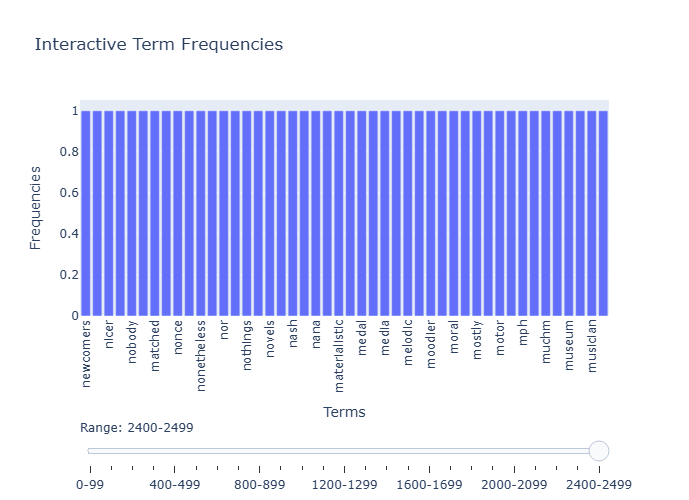



Plot of Term Frequencies for Category nostalgia


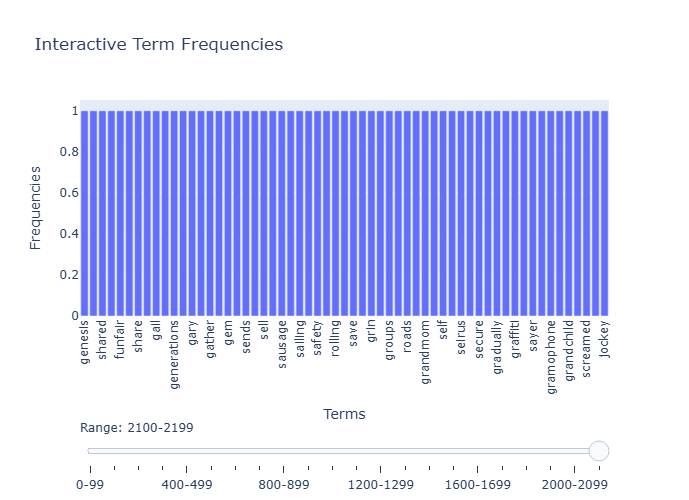

In [34]:
for category_name in categories:  #You can change it from 0 to 1
    print(f"Plot of Term Frequencies for Category {category_name}")
    ta.plot_term_frequencies(filt_term_document_dfs[category_name], start_range=0, end_range=100, logScale=False, ascending=False)
    print()
    print()

### >>> **Exercise 16 (take home):** 
Review the words that were filtered in each category and comment about the differences and similarities that you can see.

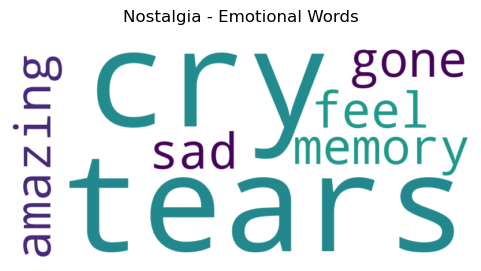

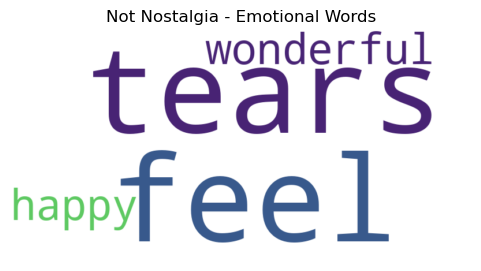

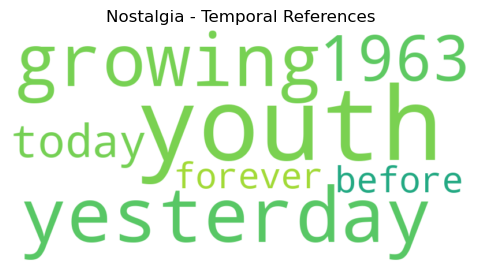

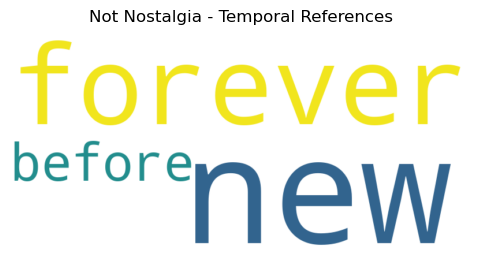

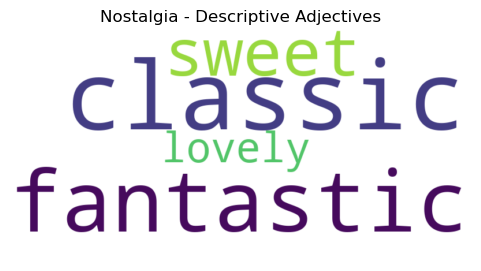

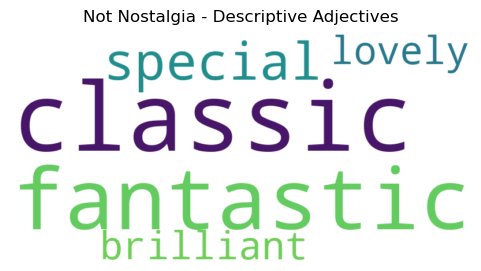

Common Words: 52
Unique Nostalgia Words: 128
Unique Not Nostalgia Words: 92

Nostalgia - Emotional Words: {'cry': 1, 'tears': 1, 'memory': 1, 'gone': 1, 'feel': 1, 'sad': 1, 'amazing': 1}
Not Nostalgia - Emotional Words: {'tears': 1, 'feel': 1, 'happy': 1, 'wonderful': 1}

Nostalgia - Temporal References: {'youth': 1, 'yesterday': 1, 'growing': 1, '1963': 1, 'today': 1, 'forever': 1, 'before': 1}
Not Nostalgia - Temporal References: {'new': 1, 'forever': 1, 'before': 1}

Nostalgia - Descriptive Adjectives: {'classic': 1, 'fantastic': 1, 'sweet': 1, 'lovely': 1}
Not Nostalgia - Descriptive Adjectives: {'classic': 1, 'fantastic': 1, 'special': 1, 'brilliant': 1, 'lovely': 1}


In [35]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Step 1: Load data from files
def load_patterns(file_path):
    with open(file_path, 'r') as file:
        patterns = file.read().splitlines()
    return [pattern.split(":")[0].strip() for pattern in patterns]

# Load patterns from both files
nostalgia_patterns = load_patterns("freq_patterns_nostalgia_minSup9.txt")
not_nostalgia_patterns = load_patterns("freq_patterns_not_nostalgia_minSup9.txt")

# Step 2: Identify common and unique words
common_words = set(nostalgia_patterns) & set(not_nostalgia_patterns)
unique_nostalgia = set(nostalgia_patterns) - common_words
unique_not_nostalgia = set(not_nostalgia_patterns) - common_words

# Step 3: Frequency analysis for emotional, temporal, and descriptive words
emotional_words = ["cry", "tears", "memory", "gone", "feel", "happy", "wonderful", "sad", "amazing"]
temporal_words = ["youth", "yesterday", "growing", "1963", "today", "new", "yesterday", "forever", "before"]
descriptive_adjectives = ["classic", "fantastic", "sweet", "special", "brilliant", "lovely"]

# Count occurrences in both sets
def word_category_analysis(patterns, words):
    counter = Counter(patterns)
    return {word: counter[word] for word in words if word in counter}

nostalgia_emotions = word_category_analysis(nostalgia_patterns, emotional_words)
not_nostalgia_emotions = word_category_analysis(not_nostalgia_patterns, emotional_words)

nostalgia_temporal = word_category_analysis(nostalgia_patterns, temporal_words)
not_nostalgia_temporal = word_category_analysis(not_nostalgia_patterns, temporal_words)

nostalgia_descriptions = word_category_analysis(nostalgia_patterns, descriptive_adjectives)
not_nostalgia_descriptions = word_category_analysis(not_nostalgia_patterns, descriptive_adjectives)

# Step 4: Visualizations
def plot_wordcloud(word_dict, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_dict)
    plt.figure(figsize=(6, 3))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Generate word clouds for analysis
plot_wordcloud(nostalgia_emotions, "Nostalgia - Emotional Words")
plot_wordcloud(not_nostalgia_emotions, "Not Nostalgia - Emotional Words")
plot_wordcloud(nostalgia_temporal, "Nostalgia - Temporal References")
plot_wordcloud(not_nostalgia_temporal, "Not Nostalgia - Temporal References")
plot_wordcloud(nostalgia_descriptions, "Nostalgia - Descriptive Adjectives")
plot_wordcloud(not_nostalgia_descriptions, "Not Nostalgia - Descriptive Adjectives")

# Step 5: Display Findings
print("Common Words:", len(common_words))
print("Unique Nostalgia Words:", len(unique_nostalgia))
print("Unique Not Nostalgia Words:", len(unique_not_nostalgia))

print("\nNostalgia - Emotional Words:", nostalgia_emotions)
print("Not Nostalgia - Emotional Words:", not_nostalgia_emotions)

print("\nNostalgia - Temporal References:", nostalgia_temporal)
print("Not Nostalgia - Temporal References:", not_nostalgia_temporal)

print("\nNostalgia - Descriptive Adjectives:", nostalgia_descriptions)
print("Not Nostalgia - Descriptive Adjectives:", not_nostalgia_descriptions)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hylin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\hylin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hylin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


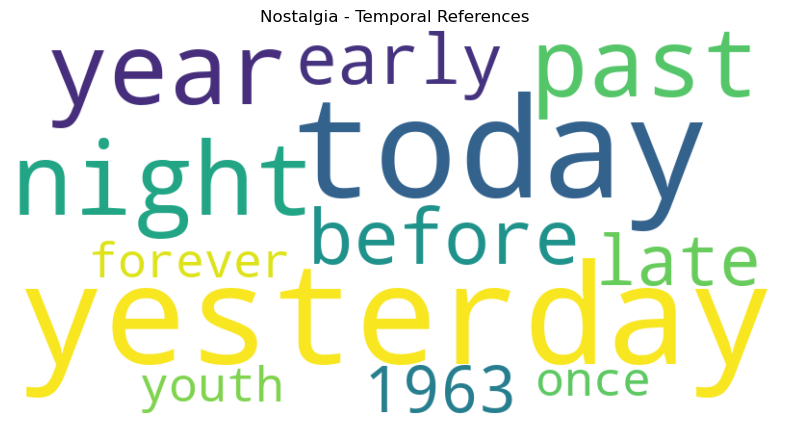

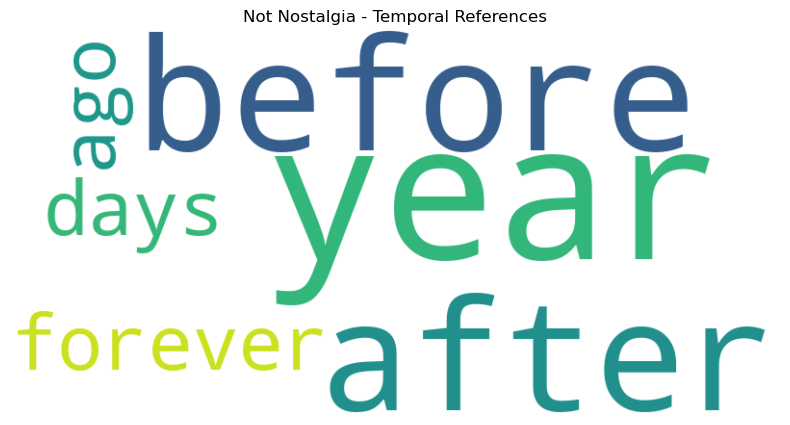

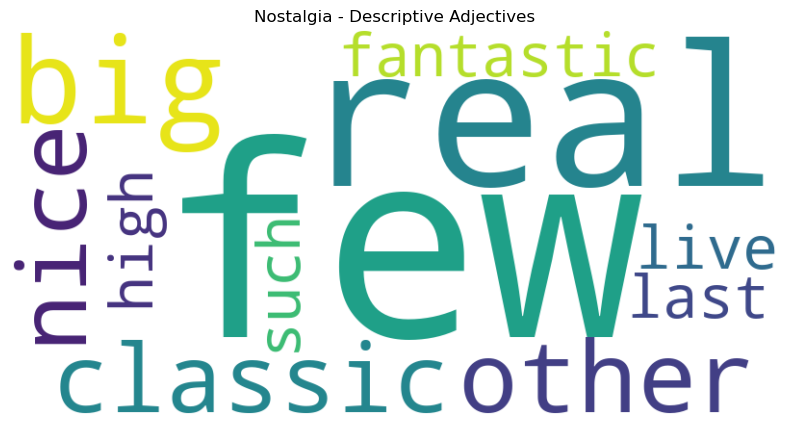

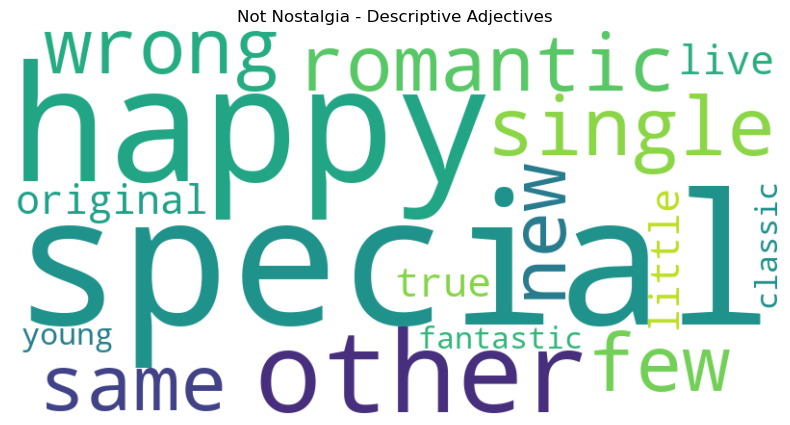

Nostalgia Emotional Words: {'positive': 15, 'negative': 9, 'joy': 10, 'sadness': 6, 'anger': 3, 'anticipation': 7, 'trust': 12, 'fear': 3, 'surprise': 3, 'disgust': 1}
Not Nostalgia Emotional Words: {'positive': 18, 'negative': 5, 'joy': 16, 'sadness': 2, 'anger': 3, 'anticipation': 11, 'trust': 14, 'fear': 1, 'surprise': 5, 'disgust': 1}

Nostalgia - Temporal References: {'yesterday': 1, 'today': 1, 'night': 1, 'year': 1, 'past': 1, 'before': 1, 'early': 1, 'late': 1, '1963': 1, 'youth': 1, 'forever': 1, 'once': 1}
Not Nostalgia - Temporal References: {'year': 1, 'before': 1, 'after': 1, 'forever': 1, 'days': 1, 'ago': 1}

Nostalgia - Descriptive Adjectives: [('few', 1), ('real', 1), ('big', 1), ('other', 1), ('classic', 1), ('nice', 1), ('fantastic', 1), ('last', 1), ('live', 1), ('high', 1)]
Not Nostalgia - Descriptive Adjectives: [('special', 1), ('happy', 1), ('other', 1), ('single', 1), ('wrong', 1), ('few', 1), ('romantic', 1), ('new', 1), ('same', 1), ('original', 1)]


In [36]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import wordnet
from nrclex import NRCLex
import nltk
from nltk import pos_tag, word_tokenize

# Ensure necessary NLTK data is downloaded
nltk.download('wordnet')  # WordNet for synonym lookup
nltk.download('averaged_perceptron_tagger')  # POS tagging
nltk.download('punkt')  # Tokenizer
# nltk.download('all')  # Uncomment to download all NLTK data (~3.4 GB)

# Step 1: Load patterns from specified files
def load_patterns(file_path):
    with open(file_path, 'r') as file:
        patterns = file.read().splitlines()
    # Return only the pattern part before the colon
    return [pattern.split(":")[0].strip() for pattern in patterns]

# Load patterns from both nostalgia and not-nostalgia files
nostalgia_patterns = load_patterns("freq_patterns_nostalgia_minSup9.txt")
not_nostalgia_patterns = load_patterns("freq_patterns_not_nostalgia_minSup9.txt")

# Step 2: Analyze emotional words using NRCLex
def categorize_with_nrclex(word_list):
    # Dictionary to hold counts of different emotions
    emotions_dict = {'positive': [], 'negative': [], 'joy': [], 'sadness': [], 
                     'anger': [], 'anticipation': [], 'trust': [], 
                     'fear': [], 'surprise': [], 'disgust': []}
    for word in word_list:
        analysis = NRCLex(word)  # Analyze word for emotions
        # Count the words associated with each emotion
        for emotion in emotions_dict.keys():
            if emotion in analysis.raw_emotion_scores:
                emotions_dict[emotion].append(word)
    return {k: len(v) for k, v in emotions_dict.items()}  # Return counts

# Step 3: Define temporal words and count their occurrences
temporal_words = [
    "yesterday", "today", "tomorrow", "morning", "evening", "night", "week", 
    "month", "year", "decade", "century", "past", "present", "future", "now", 
    "then", "before", "after", "early", "late", "1963", "youth", "forever", 
    "years", "months", "days", "once", "ago"
]

def count_temporal_words(patterns, temporal_list):
    # Count occurrences of each temporal word in the patterns
    return {word: patterns.count(word) for word in temporal_list if word in patterns}

# Count temporal words in both sets of patterns
nostalgia_temporal = count_temporal_words(nostalgia_patterns, temporal_words)
not_nostalgia_temporal = count_temporal_words(not_nostalgia_patterns, temporal_words)

# Step 4: Extract adjectives from patterns using POS tagging
def extract_adjectives(word_list):
    adjectives = []
    for pattern in word_list:
        tokens = word_tokenize(pattern)  # Tokenize the pattern
        pos_tags = pos_tag(tokens)  # Get POS tags for tokens
        # Extract adjectives (tagged as 'JJ')
        adjectives.extend([word for word, tag in pos_tags if tag == 'JJ'])
    return Counter(adjectives)  # Return counts of adjectives

# Extract adjectives from both sets of patterns
nostalgia_adjectives = extract_adjectives(nostalgia_patterns)
not_nostalgia_adjectives = extract_adjectives(not_nostalgia_patterns)

# Step 5: Create visualizations and display findings
def plot_wordcloud(word_dict, title):
    # Generate a word cloud from the given dictionary of word frequencies
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_dict)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Hide axes
    plt.title(title)  # Set title for the word cloud
    plt.show()  # Display the plot

# Generate word clouds for temporal references
plot_wordcloud(nostalgia_temporal, "Nostalgia - Temporal References")
plot_wordcloud(not_nostalgia_temporal, "Not Nostalgia - Temporal References")

# Generate word clouds for descriptive adjectives
plot_wordcloud(nostalgia_adjectives, "Nostalgia - Descriptive Adjectives")
plot_wordcloud(not_nostalgia_adjectives, "Not Nostalgia - Descriptive Adjectives")

# Display findings from emotional word categorization
print("Nostalgia Emotional Words:", categorize_with_nrclex(nostalgia_patterns))
print("Not Nostalgia Emotional Words:", categorize_with_nrclex(not_nostalgia_patterns))

print("\nNostalgia - Temporal References:", nostalgia_temporal)
print("Not Nostalgia - Temporal References:", not_nostalgia_temporal)

print("\nNostalgia - Descriptive Adjectives:", nostalgia_adjectives.most_common(10))
print("Not Nostalgia - Descriptive Adjectives:", not_nostalgia_adjectives.most_common(10))


#### Converting the filtered term-document matrix to transactional database

In [38]:
from PAMI.extras.DF2DB import DenseFormatDF as db

# Loop through the dictionary of term-document DataFrames
for category in filt_term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace(' ', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = db.DenseFormatDF(filt_term_document_dfs[category])
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)

#### Printing and visualizing stats for transactional database (for determining support threshold)

Database size (total no of transactions) : 745
Number of items : 2446
Minimum Transaction Size : 1
Average Transaction Size : 8.410738255033557
Maximum Transaction Size : 46
Standard Deviation Transaction Size : 5.926429722323316
Variance in Transaction Sizes : 35.16977700801039
Sparsity : 0.9965614316210002


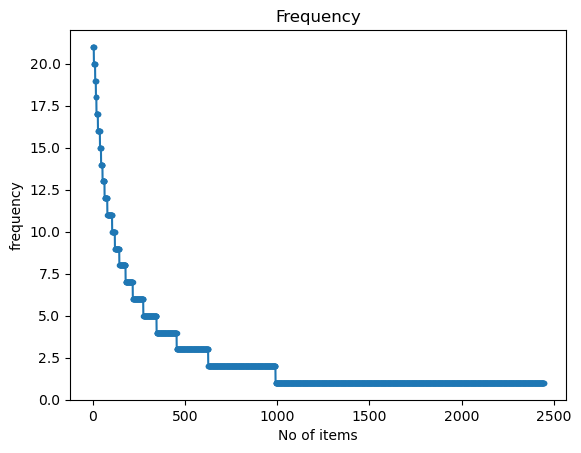

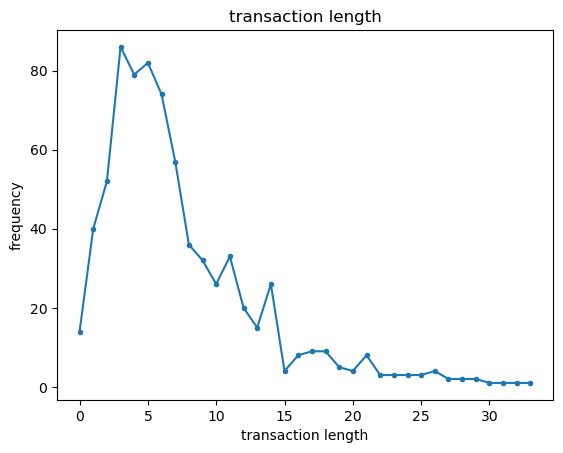

In [39]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_not_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 734
Number of items : 2159
Minimum Transaction Size : 1
Average Transaction Size : 8.693460490463215
Maximum Transaction Size : 39
Standard Deviation Transaction Size : 7.213372063492091
Variance in Transaction Sizes : 52.103722524357735
Sparsity : 0.9959733855996001


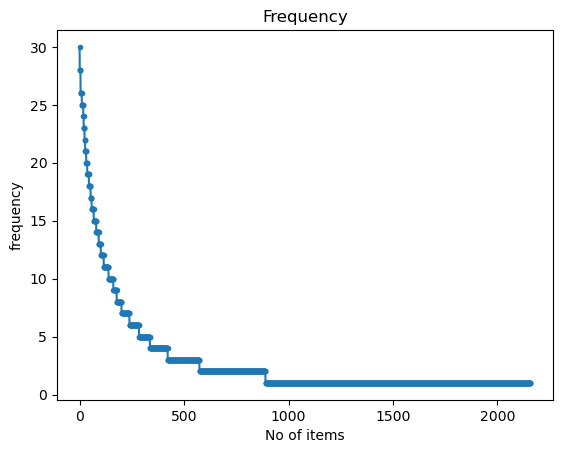

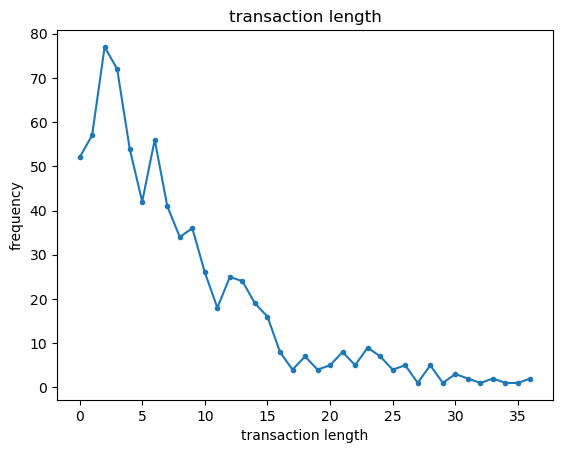

In [40]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

#### Apply FPGrowth algorithms to finding frequent patterns for each category

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 144
Runtime: 0.012998104095458984
Plot of Frequent Patterns for Category not_nostalgia


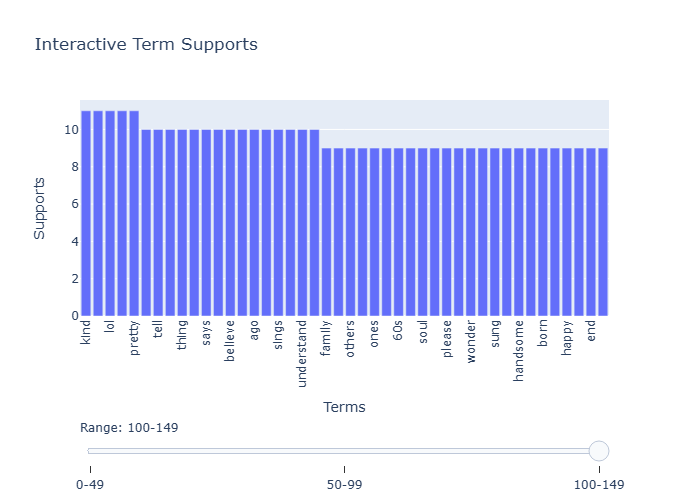

In [42]:
from PAMI.frequentPattern.basic import FPGrowth as alg

# Set the minimum support threshold for frequent pattern mining
minSup = 9

# Initialize the FPGrowth algorithm with the input file and minimum support
obj1 = alg.FPGrowth(iFile='td_freq_db_not_nostalgia.csv', minSup=minSup)

# Mine the frequent patterns from the dataset
obj1.mine()

# Retrieve the frequent patterns as a DataFrame
frequentPatternsDF_not_nostalgia = obj1.getPatternsAsDataFrame()

# Print the total number of frequent patterns found
print('Total Number of Patterns: ' + str(len(frequentPatternsDF_not_nostalgia)))

# Measure and print the runtime of the mining process
print('Runtime: ' + str(obj1.getRuntime()))

# Save the discovered patterns to a text file
obj1.save('freq_patterns_not_nostalgia_minSup9.txt')

# Display a plot of the frequent patterns for the category "not_nostalgia"
print('Plot of Frequent Patterns for Category not_nostalgia')
ta.plot_frequent_patterns(frequentPatternsDF_not_nostalgia, start_range=0, end_range=50, ascending=False)


Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 180
Runtime: 0.016017436981201172
Plot of Frequent Patterns for Category nostalgia


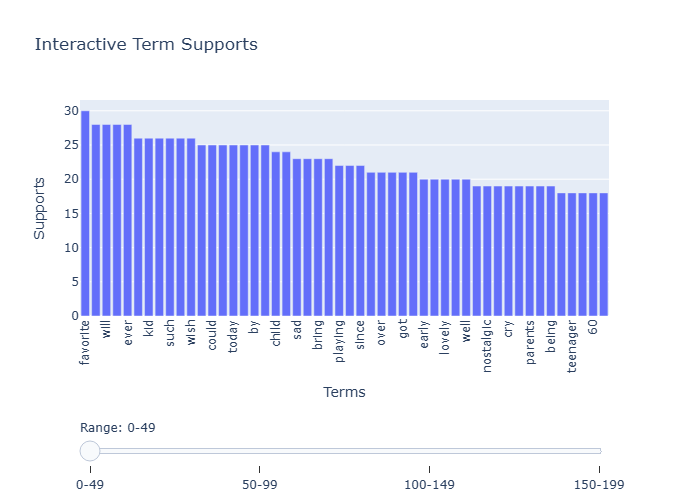

In [43]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_nostalgia = obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime
obj1.save('freq_patterns_nostalgia_minSup9.txt') #save the patterns

print('Plot of Frequent Patterns for Category nostalgia')
ta.plot_frequent_patterns(frequentPatternsDF_nostalgia, start_range=0, end_range=50, ascending=False)

### For each category, filter the patterns to keep only the unique ones

In [44]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_not_nostalgia, frequentPatternsDF_nostalgia]

# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

{'favorites': 1,
 'special': 1,
 'soul': 1,
 'mind': 1,
 '60': 2,
 '60s': 2,
 'family': 1,
 'ones': 1,
 'things': 1,
 'others': 1,
 'pure': 1,
 'please': 1,
 'though': 1,
 'wonder': 1,
 'person': 1,
 'sung': 1,
 'year': 2,
 'handsome': 1,
 'perfect': 1,
 'born': 2,
 'll': 1,
 'happy': 1,
 'almost': 1,
 'end': 1,
 'rock': 1,
 'says': 1,
 'other': 2,
 'emotion': 1,
 'tell': 1,
 'movie': 1,
 'believe': 1,
 'thing': 1,
 'ago': 1,
 'friend': 2,
 'lady': 1,
 'sings': 1,
 'down': 2,
 'want': 2,
 'understand': 1,
 'generation': 1,
 'hit': 2,
 'which': 2,
 'enjoy': 1,
 'yes': 2,
 'long': 2,
 'put': 1,
 'someone': 1,
 'away': 2,
 'work': 1,
 'band': 1,
 'does': 1,
 'find': 2,
 'called': 1,
 'lol': 1,
 'words': 2,
 'didn': 2,
 'voices': 1,
 'eyes': 2,
 'thought': 1,
 'kind': 2,
 're': 1,
 'dance': 2,
 'lot': 2,
 'pretty': 1,
 'gonna': 1,
 'sounds': 1,
 'brilliant': 1,
 'girl': 2,
 'around': 2,
 'tears': 2,
 'single': 1,
 'wrong': 1,
 'tune': 2,
 'few': 2,
 'nowadays': 1,
 'lovely': 2,
 'times': 1

In [46]:
# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
len(unique_patterns)

220

Number of patterns discarded: 104
Plot of Unique Frequent Patterns


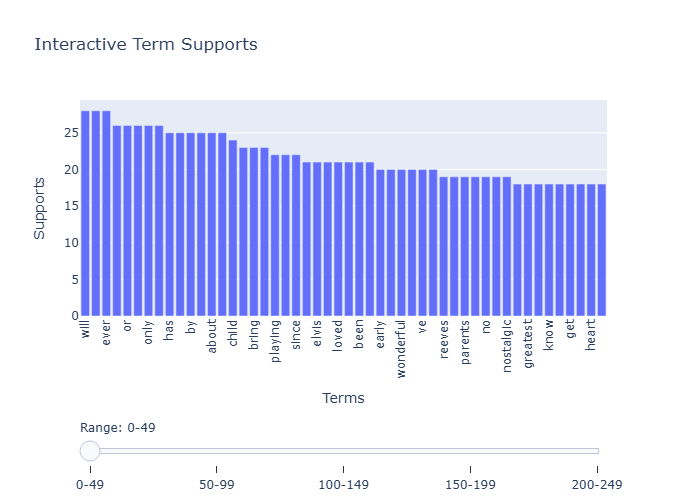

In [49]:
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)

# Determine the number of patterns that were discarded by subtracting the count of unique patterns from the total
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# Filter the patterns for each category to keep only the unique ones
filtered_dfs = []  # List to store filtered DataFrames
for df in dfs:
    # Keep only the patterns that are in the unique_patterns set
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)  # Add the filtered DataFrame to the list

# Concatenate all filtered DataFrames into a final DataFrame
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Print the number of patterns that were discarded
print(f"Number of patterns discarded: {discarded_patterns_count}")

# Display the plot of unique frequent patterns
print('Plot of Unique Frequent Patterns')
ta.plot_frequent_patterns(final_pattern_df, start_range=0, end_range=50, ascending=False)


### Transform the texts into the frequency-based term-document matrix

In [67]:
from sklearn.feature_extraction.text import CountVectorizer

# Adding stop_words to the CountVectorizer can reduce the feature space 
# from 3730 to 3520 dimensions. However, experiments indicated that this 
# reduction did not enhance classification performance. Hence, the line below is commented out.
# vectorizer = CountVectorizer(stop_words=stop_words_list)

# Initialize the CountVectorizer to convert the 'text' column into a term-document matrix
count_vectorizer = CountVectorizer()  # Create an instance of CountVectorizer
tokenizer = count_vectorizer.build_analyzer()  # Build the tokenizer for text analysis

# Create a term-document matrix, ensuring the index parameter is set for consistent indexing
# This is especially important when concatenating multiple DataFrames
tdm_df = dmh.create_term_document_df(X['text'], vectorizer=count_vectorizer, index=X.index)

# Output the resulting term-document matrix
tdm_df


00  000  045  07  10  100  10m  11  11th  12  ...  yours  yourself  \
0      0    0    0   0   0    0    0   0     0   0  ...      0         0   
1      0    0    0   0   0    0    0   0     0   0  ...      0         0   
2      0    0    0   0   0    0    0   0     0   0  ...      0         0   
3      0    0    0   0   0    0    0   0     0   0  ...      0         0   
4      0    0    0   0   0    0    0   0     0   0  ...      0         0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...       ...   
1495   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1496   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1497   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1498   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1499   0    0    0   0   0    0    0   0     0   0  ...      0         0   

      youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
0         0         0        0    0    0    0        0      0  
1         0         0        0    0    0    0        0      0  
2         0         0        0    0    0    0        0      0  
3         0         0        0    0    0    0        0      0  
4         0         0        0    0    0    0        0      0  
...     ...       ...      ...  ...  ...  ...      ...    ...  
1495      0         0        0    0    0    0        0      0  
1496      0         0        0    0    0    0        0      0  
1497      0         0        0    0    0    0        0      0  
1498      0         0        0    0    0    0        0      0  
1499      0         0        0    0    0    0        0      0  

[1499 rows x 3730 columns]

### Transform the texts into the TF-IDF-based term-document matrix

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert 'text' column into tf-idf-based term-document matrix using TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# don't forget the index parameter for consistent indexing, especially for concating two dataframes
tfidf_tdm_df = dmh.create_term_document_df(X['text'], vectorizer=tfidf_vectorizer, index=X.index)
tfidf_tdm_df

00  000  045   07   10  100  10m   11  11th   12  ...  yours  yourself  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...   ...  ...  ...    ...       ...   
1495  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
1496  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
1497  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
1498  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
1499  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   

      youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
0       0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
1       0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
2       0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
3       0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
4       0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
...     ...       ...      ...  ...  ...  ...      ...    ...  
1495    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
1496    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
1497    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
1498    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
1499    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  

[1499 rows x 3730 columns]

### Transform the unique patterns into the 0/1 patterm-document matrix

In [69]:
# Tokenize the text into words and convert each tokenized text to a set representation
X['tokenized_text'] = X['text'].apply(tokenizer).apply(set)

# Initialize the pattern matrix with zeros
# Rows correspond to the original DataFrame indices, and columns correspond to the patterns in final_pattern_df
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern to check if all words in the pattern are present in the tokenized text
for pattern in final_pattern_df['Patterns']:
    # Tokenize the pattern into words and convert to a set
    pattern_words = set(pattern.split())
    
    # Update the pattern matrix: mark as 1 if the pattern words are a subset of the tokenized text, else 0
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Display the resulting pattern matrix
pattern_matrix


Patterns  favorites  special  soul  mind  family  ones  things  others  pure  \
0                 0        0     0     0       0     0       0       0     0   
1                 0        0     0     0       0     0       0       0     0   
2                 0        0     0     0       0     0       0       0     0   
3                 0        0     0     0       0     0       0       0     0   
4                 0        0     0     0       0     0       0       0     0   
...             ...      ...   ...   ...     ...   ...     ...     ...   ...   
1495              0        0     0     0       0     0       0       0     0   
1496              0        0     0     0       0     0       0       0     0   
1497              0        0     0     0       0     0       0       0     0   
1498              0        0     0     0       0     0       0       1     0   
1499              0        0     0     0       0     0       0       0     0   

Patterns  please  ...  could  could wish  kid  only  such  or  wish  ever  \
0              0  ...      0           0    0     0     0   0     0     0   
1              0  ...      0           0    1     0     0   0     0     1   
2              0  ...      0           0    0     0     0   0     0     0   
3              0  ...      0           0    0     0     0   0     0     0   
4              0  ...      0           0    0     0     0   0     0     0   
...          ...  ...    ...         ...  ...   ...   ...  ..   ...   ...   
1495           0  ...      0           0    0     0     0   1     0     0   
1496           0  ...      0           0    0     0     1   0     0     0   
1497           0  ...      0           0    0     0     0   0     0     0   
1498           0  ...      0           0    0     0     0   1     0     0   
1499           0  ...      0           0    0     0     0   0     0     0   

Patterns  would  will  
0             0     0  
1             0     0  
2             0     0  
3             0     0  
4             0     0  
...         ...   ...  
1495          1     0  
1496          0     0  
1497          0     0  
1498          0     0  
1499          0     0  

[1499 rows x 220 columns]

### Concatenate the frequence-based term-document matrix and the pattern matrix to augment the features

In [70]:
# Concatenate the original TDM and the pattern matrix to augment the features
augmented_tdm_df = pd.concat([tdm_df, pattern_matrix], axis=1)
augmented_tdm_df

00  000  045  07  10  100  10m  11  11th  12  ...  could  could wish  \
0      0    0    0   0   0    0    0   0     0   0  ...      0           0   
1      0    0    0   0   0    0    0   0     0   0  ...      0           0   
2      0    0    0   0   0    0    0   0     0   0  ...      0           0   
3      0    0    0   0   0    0    0   0     0   0  ...      0           0   
4      0    0    0   0   0    0    0   0     0   0  ...      0           0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...         ...   
1495   0    0    0   0   0    0    0   0     0   0  ...      0           0   
1496   0    0    0   0   0    0    0   0     0   0  ...      0           0   
1497   0    0    0   0   0    0    0   0     0   0  ...      0           0   
1498   0    0    0   0   0    0    0   0     0   0  ...      0           0   
1499   0    0    0   0   0    0    0   0     0   0  ...      0           0   

      kid  only  such  or  wish  ever  would  will  
0       0     0     0   0     0     0      0     0  
1       1     0     0   0     0     1      0     0  
2       0     0     0   0     0     0      0     0  
3       0     0     0   0     0     0      0     0  
4       0     0     0   0     0     0      0     0  
...   ...   ...   ...  ..   ...   ...    ...   ...  
1495    0     0     0   1     0     0      1     0  
1496    0     0     1   0     0     0      0     0  
1497    0     0     0   0     0     0      0     0  
1498    0     0     0   1     0     0      0     0  
1499    0     0     0   0     0     0      0     0  

[1499 rows x 3950 columns]

### Concatenate the tf-idf-based term-document matrix and the pattern matrix to augment the features

In [71]:
# Concatenate the original TDM and the pattern matrix to augment the features
augmented_tfidf_tdm_df = pd.concat([tfidf_tdm_df, pattern_matrix], axis=1)
augmented_tfidf_tdm_df

00  000  045   07   10  100  10m   11  11th   12  ...  could  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...      0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...      0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...      0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...      0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...      0   
...   ...  ...  ...  ...  ...  ...  ...  ...   ...  ...  ...    ...   
1495  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...      0   
1496  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...      0   
1497  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...      0   
1498  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...      0   
1499  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...      0   

      could wish  kid  only  such  or  wish  ever  would  will  
0              0    0     0     0   0     0     0      0     0  
1              0    1     0     0   0     0     1      0     0  
2              0    0     0     0   0     0     0      0     0  
3              0    0     0     0   0     0     0      0     0  
4              0    0     0     0   0     0     0      0     0  
...          ...  ...   ...   ...  ..   ...   ...    ...   ...  
1495           0    0     0     0   1     0     0      1     0  
1496           0    0     0     1   0     0     0      0     0  
1497           0    0     0     0   0     0     0      0     0  
1498           0    0     0     0   1     0     0      0     0  
1499           0    0     0     0   0     0     0      0     0  

[1499 rows x 3950 columns]

### 5.5 Dimensionality Reduction

In [120]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

# Define a function to create a scatter plot for each method
def plot_scatter_2d(ax, X_reduced, title, colors, categories):
    for c, category in zip(colors, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Define a function to create a 3D scatter plot for each method
def plot_scatter_3d(ax, X_reduced, title, colors, categories):
    for c, category in zip(colors, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        zs = X_reduced[X['category_name'] == category].T[2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right')

#### Apply dimensionality reduction to the frequency-based term-document matrix and keep 2 components only

In [121]:
#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

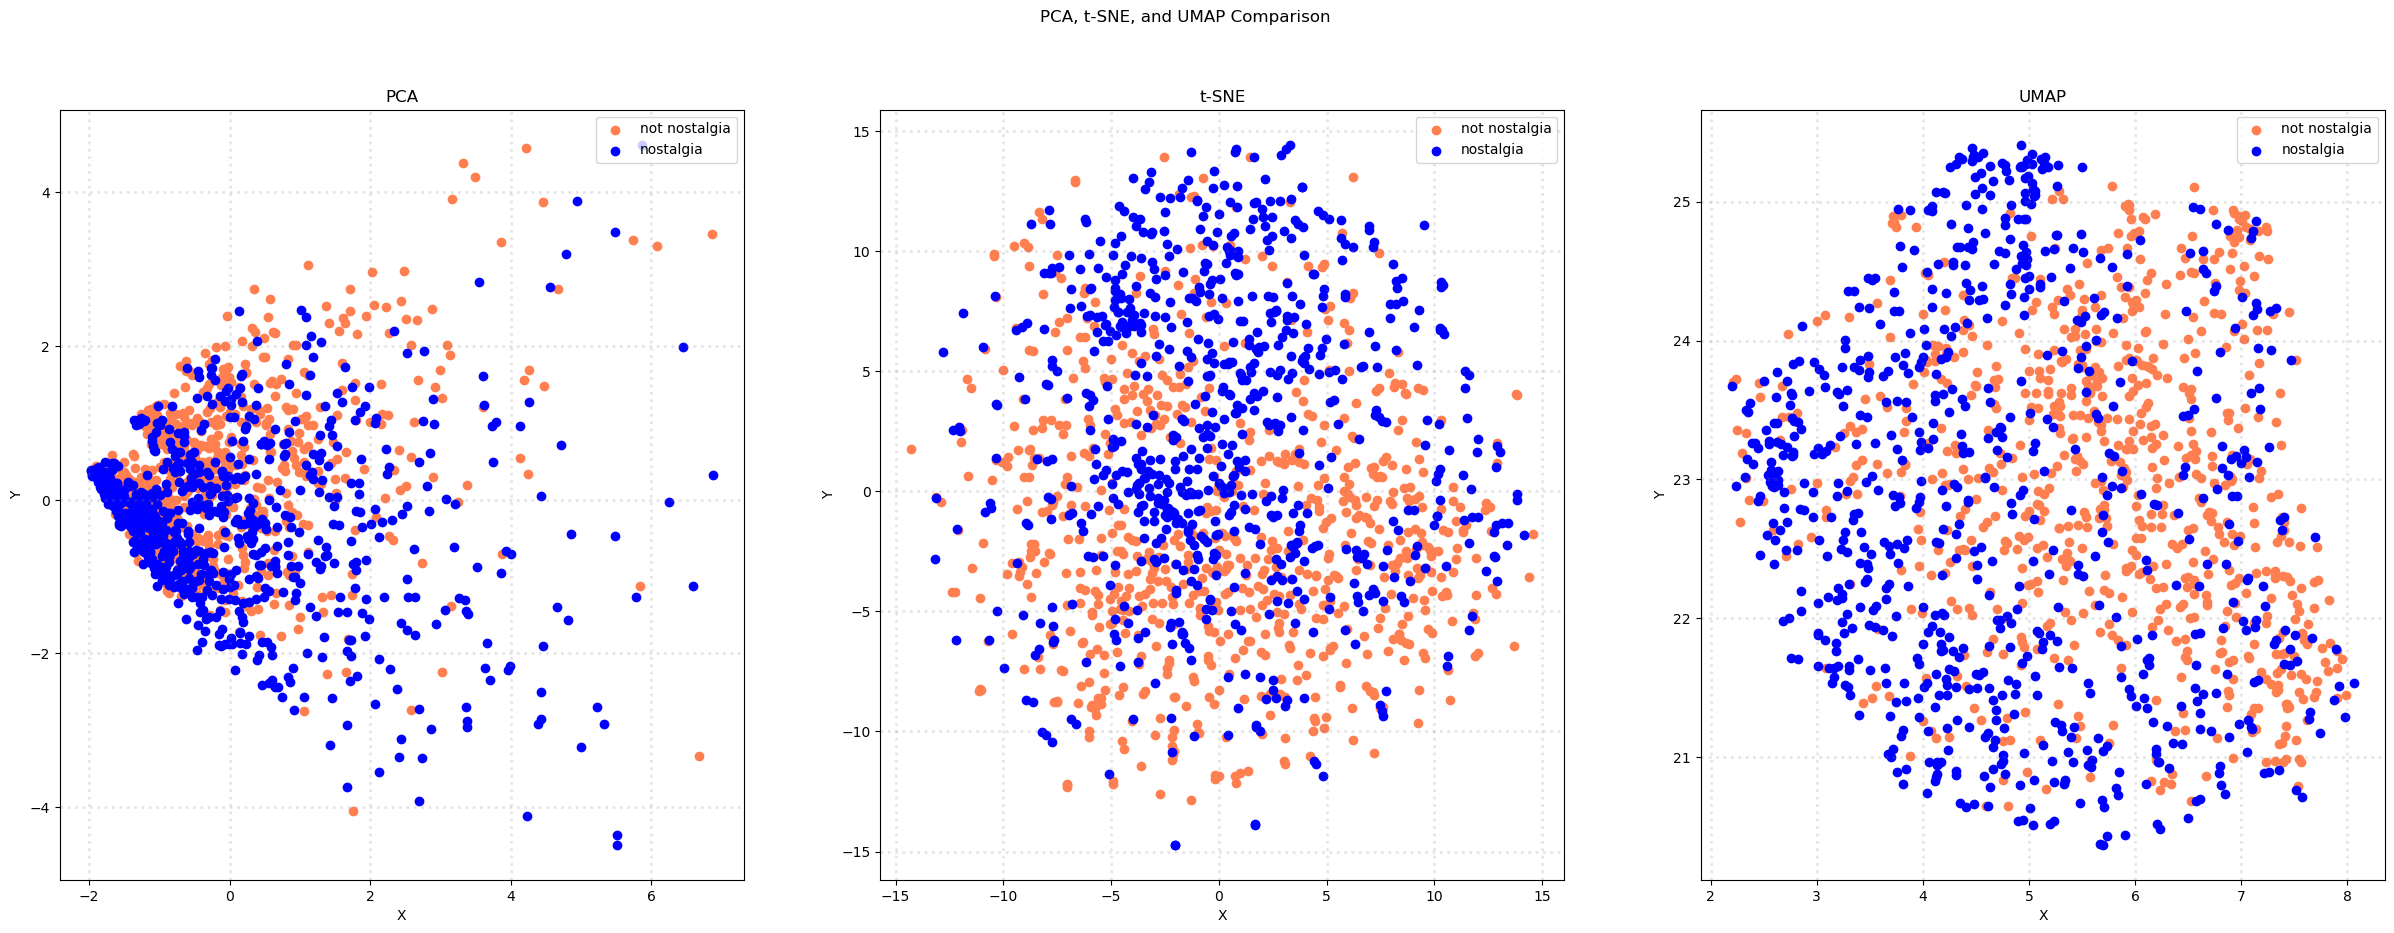

In [122]:
# Plot the PCA, t-SNE, and UMAP results in subplots
colors = ['coral', 'blue', 'black', 'orange']

# Create a figure with 3 subplots for PCA, t-SNE, and UMAP side by side
fig, axes = plt.subplots(1, 3, figsize=(30, 10))  
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Plot PCA results in the first subplot
plot_scatter_2d(axes[0], X_pca_tdm, 'PCA', colors=colors, categories=categories)

# Plot t-SNE results in the second subplot
plot_scatter_2d(axes[1], X_tsne_tdm, 't-SNE', colors=colors, categories=categories)

# Plot UMAP results in the third subplot
plot_scatter_2d(axes[2], X_umap_tdm, 'UMAP', colors=colors, categories=categories)

# Display the plots
plt.show()


#### Apply dimensionality reduction to the augmented frequency-based term-document matrix and keep 2 components only

In [123]:
#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm_aug = PCA(n_components=2).fit_transform(augmented_tdm_df.values)
X_tsne_tdm_aug = TSNE(n_components=2).fit_transform(augmented_tdm_df.values)
X_umap_tdm_aug = umap.UMAP(n_components=2).fit_transform(augmented_tdm_df.values)

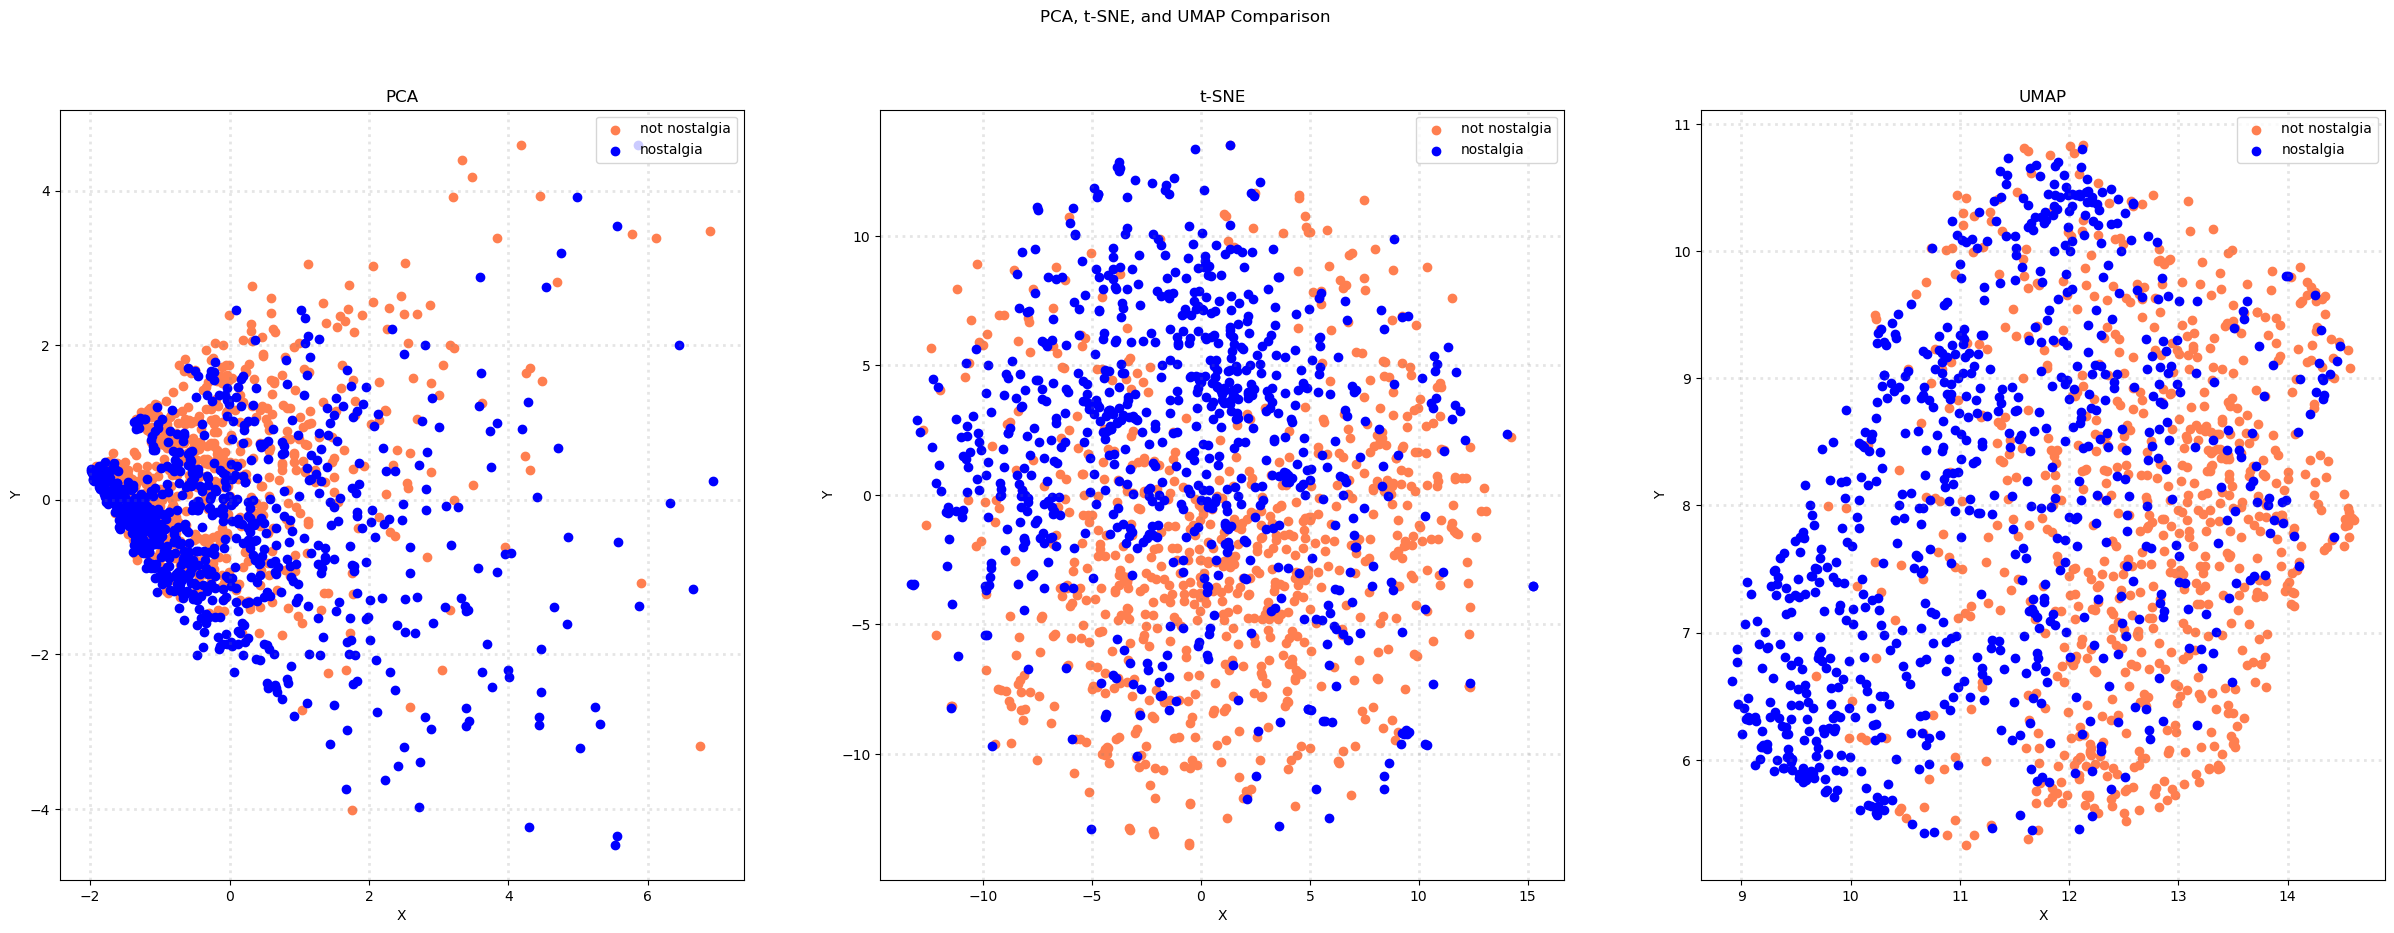

In [124]:
# Plot the results in subplots
colors = ['coral', 'blue', 'black', 'orange']

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

plot_scatter_2d(axes[0], X_pca_tdm_aug, 'PCA', colors=colors, categories=categories)
plot_scatter_2d(axes[1], X_tsne_tdm_aug, 't-SNE', colors=colors, categories=categories)
plot_scatter_2d(axes[2], X_umap_tdm_aug, 'UMAP', colors=colors, categories=categories)
plt.show()

#### Apply dimensionality reduction to the frequency-based term-document matrix and keep 3 components only

In [125]:
X_pca = PCA(n_components=3).fit_transform(tdm_df.values)
X_tsne = TSNE(n_components=3).fit_transform(tdm_df.values)
X_umap = umap.UMAP(n_components=3).fit_transform(tdm_df.values)

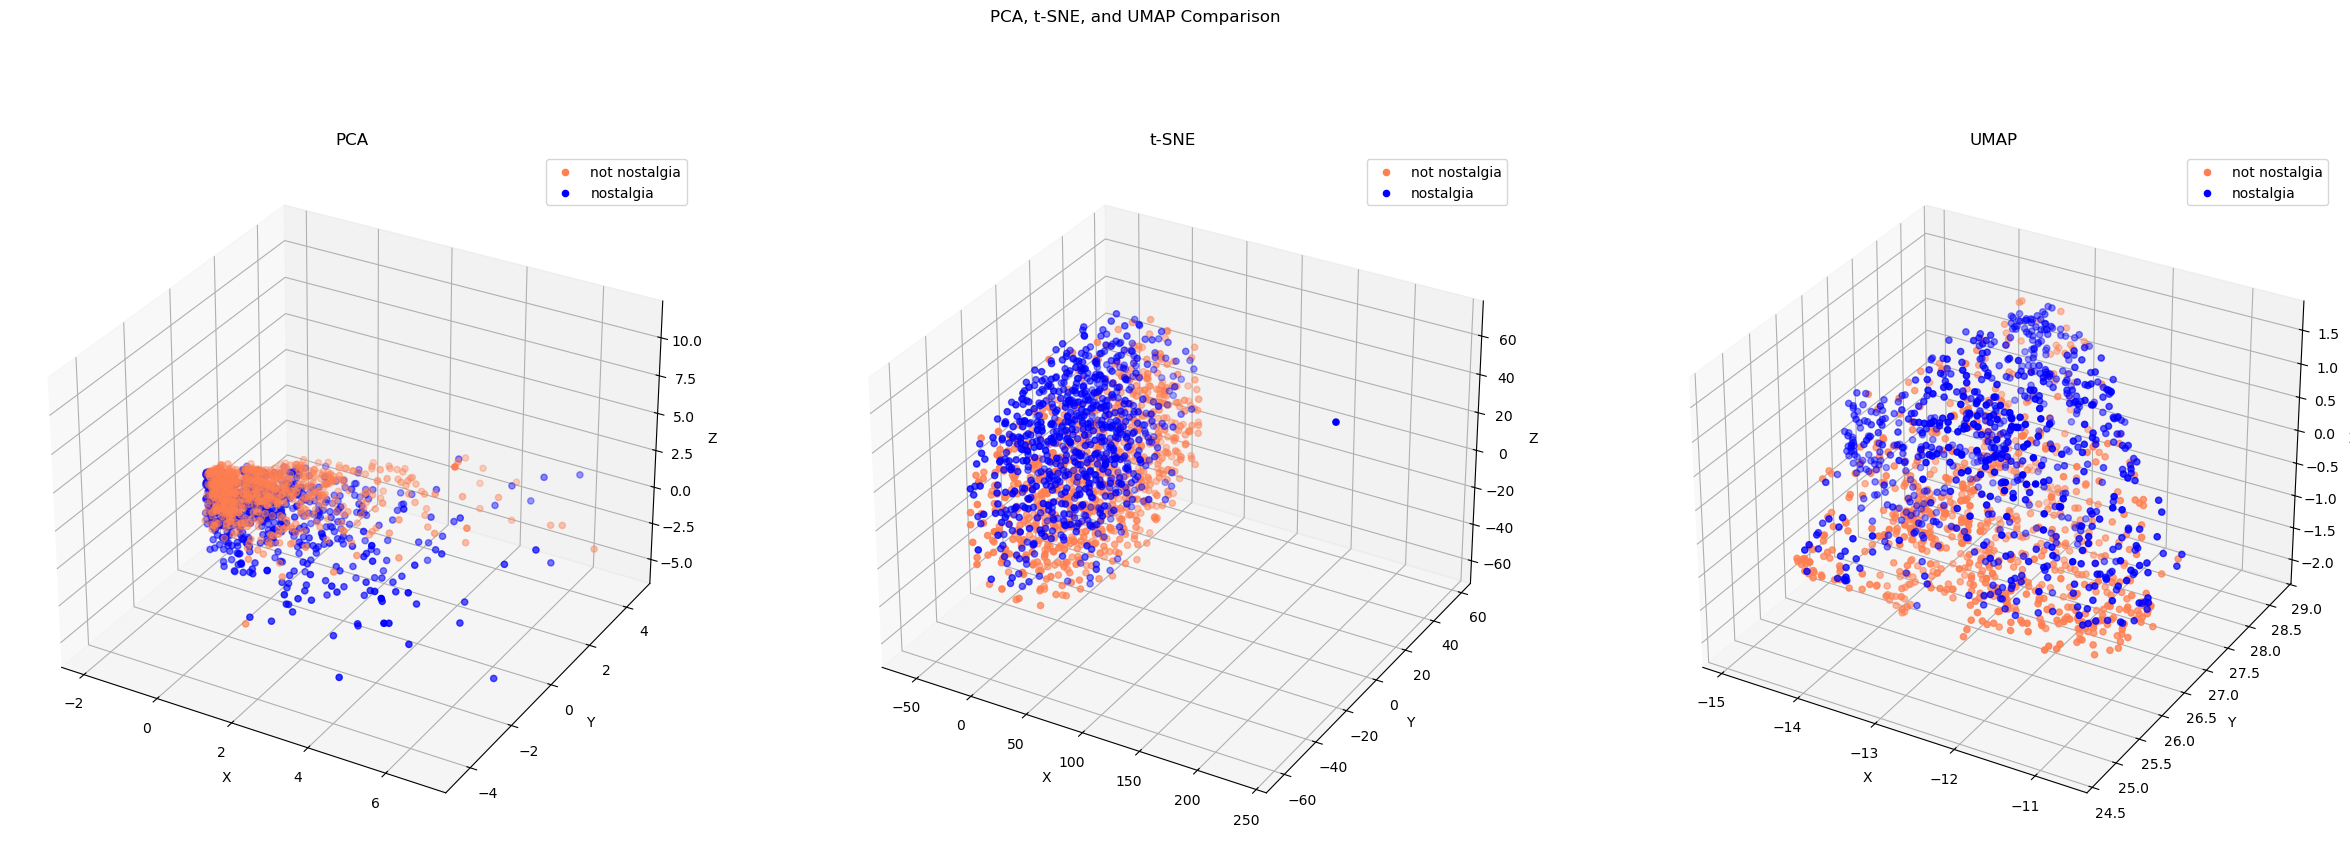

In [130]:
# Plot the results in subplots
fig = plt.figure(figsize=(30, 10))  # Create 3D subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Create 3D subplots
ax_pca = fig.add_subplot(131, projection='3d')
ax_tsne = fig.add_subplot(132, projection='3d')
ax_umap = fig.add_subplot(133, projection='3d')

# Create 3D scatter plots for PCA, t-SNE, and UMAP
plot_scatter_3d(ax_pca, X_pca, 'PCA', colors=colors, categories=categories)
plot_scatter_3d(ax_tsne, X_tsne, 't-SNE', colors=colors, categories=categories)
plot_scatter_3d(ax_umap, X_umap, 'UMAP', colors=colors, categories=categories)

plt.show()

#### Apply dimensionality reduction to the augemented term-document matrix and keep 3 components only

In [127]:
X_pca_aug = PCA(n_components=3).fit_transform(augmented_tdm_df.values)
X_tsne_aug = TSNE(n_components=3).fit_transform(augmented_tdm_df.values)
X_umap_aug = umap.UMAP(n_components=3).fit_transform(augmented_tdm_df.values)

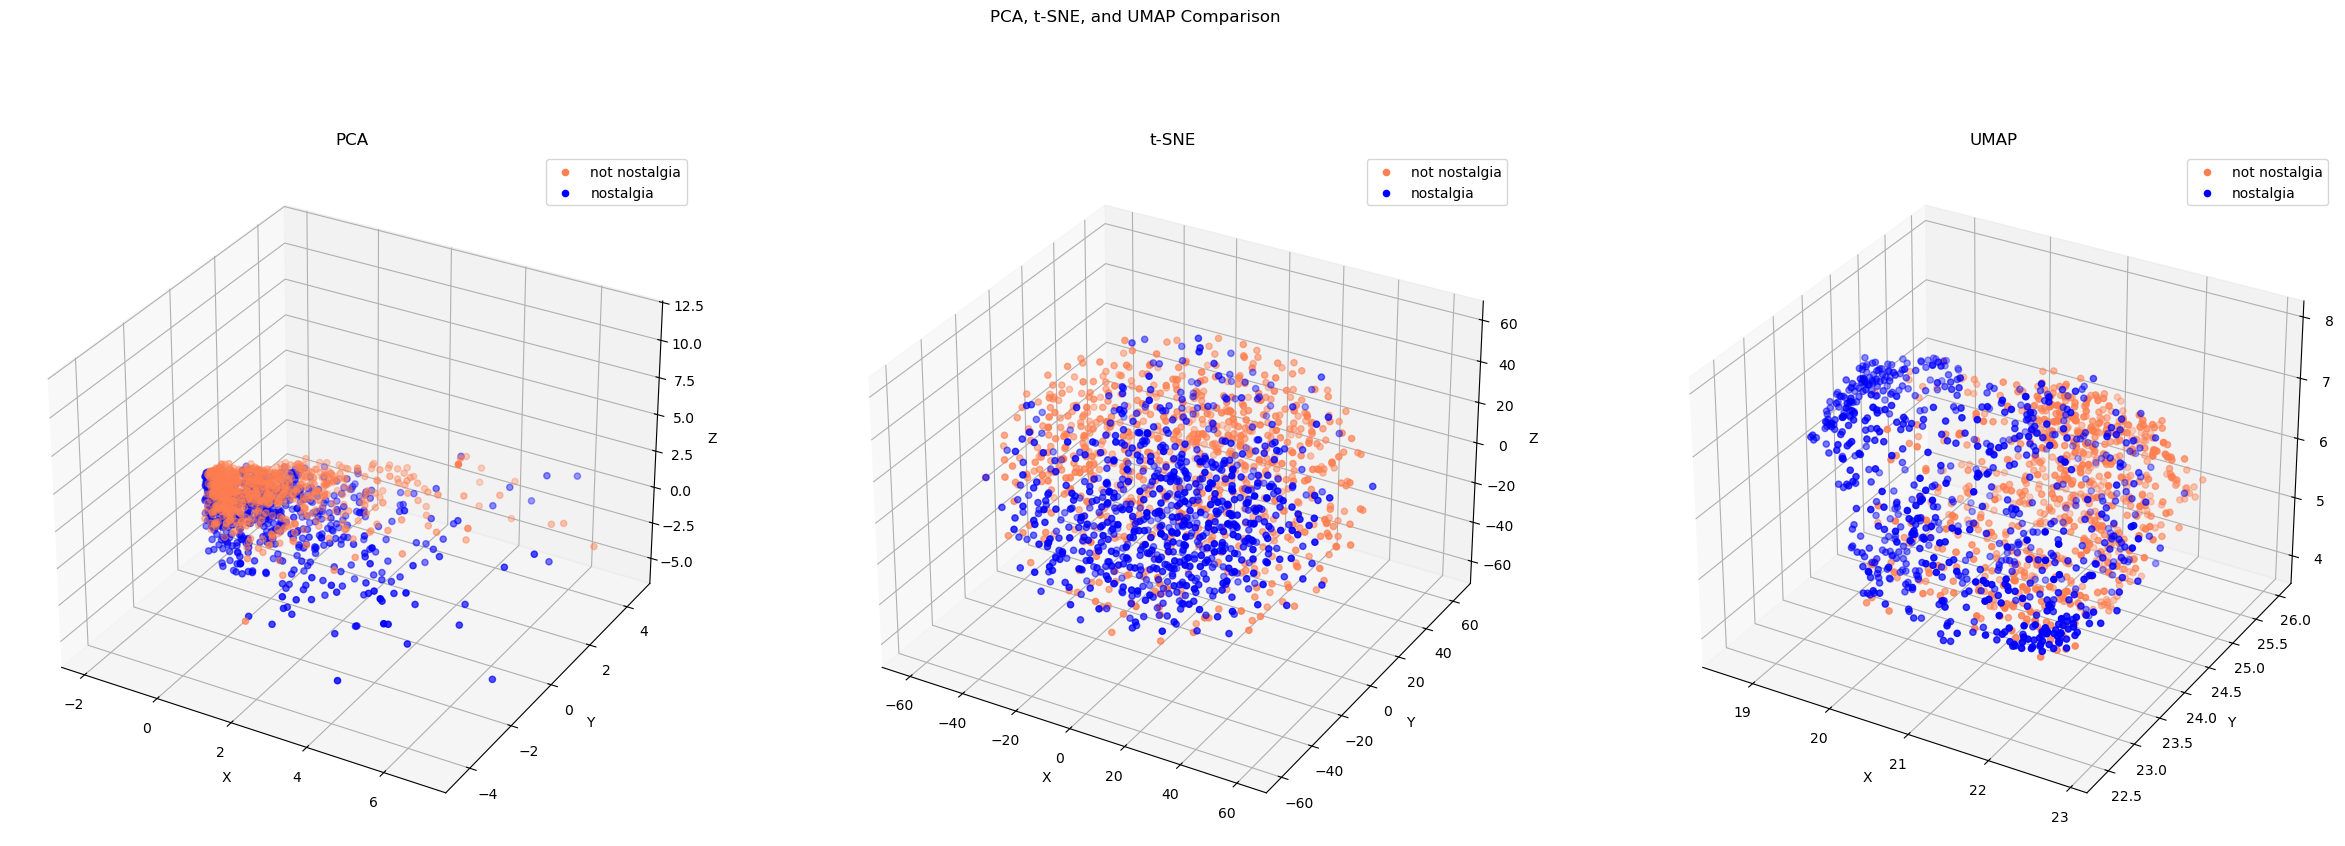

In [129]:
# Plot the results in subplots
fig = plt.figure(figsize=(30, 10))  # Create 3D subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Create 3D subplots
ax_pca = fig.add_subplot(131, projection='3d')
ax_tsne = fig.add_subplot(132, projection='3d')
ax_umap = fig.add_subplot(133, projection='3d')

# Create 3D scatter plots for PCA, t-SNE, and UMAP
plot_scatter_3d(ax_pca, X_pca_aug, 'PCA', colors=colors, categories=categories)
plot_scatter_3d(ax_tsne, X_tsne_aug, 't-SNE', colors=colors, categories=categories)
plot_scatter_3d(ax_umap, X_umap_aug, 'UMAP', colors=colors, categories=categories)

plt.show()

### 5.6 Discretization and Binarization

In [60]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [61]:
mlb = preprocessing.LabelBinarizer()

In [62]:
mlb.fit(X.category)

LabelBinarizer()

In [63]:
X['bin_category'] = mlb.transform(X['category']).tolist()

In [64]:
X[0:9]

text  category  category_name  \
0  He was a singer with a golden voice that I lov...         0  not nostalgia   
1  The mist beautiful voice ever I listened to hi...         1      nostalgia   
2  I have most of Mr. Reeves songs.  Always love ...         1      nostalgia   
3  30 day leave from 1st tour in Viet Nam to conv...         0  not nostalgia   
4  listening to his songs reminds me of my mum wh...         1      nostalgia   
5  Every time I heard this song as a child, I use...         1      nostalgia   
6  My dad loved listening to Jim Reeves, when I w...         1      nostalgia   
7  i HAVE ALSO LISTENED TO Jim Reeves since child...         1      nostalgia   
8           Wherever you  are you always in my heart         0  not nostalgia   

                                      tokenized_text bin_category  
0  {that, age, many, for, vouch, can, love, but, ...          [0]  
1  {love, when, listened, an, the, him, never, an...          [1]  
2  {town, so, it, age, always, love, around, but,...          [1]  
3  {1st, that, served, for, years, some, this, ca...          [0]  
4  {mum, listening, reminds, him, everyday, my, w...          [1]  
5  {appreciate, it, that, many, this, reeves, chi...          [1]  
6  {it, for, dad, but, when, reeves, do, loved, t...          [1]  
7  {71, love, reeves, since, feeling, tunes, have...          [1]  
8        {in, wherever, always, my, are, you, heart}          [0]

## 6.  Data Exploration

In [45]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [46]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['If I remember correctly, this song came out after Mr. Reeves passed away. I was about 10 years old when the disc jockey said that the news just came over the wire that he died in a plane crash.']
['i guess most of us leave it too late before we tell someone just how much we really love them']
['my name is thomas but know by tommy and my wifes name is laura and i always sing this to her']


In [47]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vectorizer.transform(document_to_transform_1)
document_vector_count_2 = count_vectorizer.transform(document_to_transform_2)
document_vector_count_3 = count_vectorizer.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [48]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True).squeeze()
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True).squeeze()
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True).squeeze()

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True).squeeze()
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True).squeeze()
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True).squeeze()

print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.032174
Cosine Similarity using count bw 1 and 3: 0.027864
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


#### Calculate a similarity matrix using cosine similarity for all the pairs of term-frequency-based features

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

term_document_matrix = tdm_df.copy() # Replace tdm_df with augmented_tdm_df, tfidf_tdm_df, augmented_tfidf_tdm_df, 

term_document_matrix['category_name'] = X['category_name']
term_document_matrix.sort_values(by='category_name', inplace=True)

index_names = [str(doc_id)+'-'+term_document_matrix.loc[doc_id, 'category_name'] 
               for doc_id in term_document_matrix.index.to_list()]
term_document_matrix.drop('category_name', axis=1, inplace=True)


# Step 1: Calculate the Cosine Similarity Matrix
similarity_matrix = cosine_similarity(term_document_matrix.values)

# Step 2: Convert the similarity matrix of numpy array into a dataframe
similarity_df = pd.DataFrame(similarity_matrix, columns=index_names, index=index_names)
similarity_df

ta.plot_paginated_heatmap(similarity_df)

interactive(children=(IntSlider(value=1, description='Document Page:', layout=Layout(align_self='center', heig…

#### Calculate a similarity matrix using cosine similarity for all the pairs of tf-idf-based features

## 7.  Data Classification

In [11]:
# Build a model using only the frequency-based document-term matrix (DTM)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.metrics import classification_report, accuracy_score

# Map numerical labels to their corresponding category names
category_mapping = dict(X[['category', 'category_name']].drop_duplicates().values)

# Convert numerical labels to text labels for easier interpretation
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['category'], test_size=0.3, random_state=42)

# Initialize and train a Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Predict labels for the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the model’s performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [79]:
# Create a mapping from numerical labels to category names
category_mapping = dict(X[['category', 'category_name']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(augmented_tdm_df, X['category'], test_size=0.3, random_state=42)

# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8688888888888889

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.9341    0.7834    0.8521       217
    nostalgia     0.8246    0.9485    0.8822       233

     accuracy                         0.8689       450
    macro avg     0.8793    0.8660    0.8672       450
 weighted avg     0.8774    0.8689    0.8677       450



In [80]:
# Train the model with augmented data, where the tf-idf-based term-document matrix (TDM) 
# and unique-pattern matrix are concatenated

# Create a mapping from numerical labels to category names
category_mapping = dict(X[['category', 'category_name']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(augmented_tfidf_tdm_df, X['category'], test_size=0.3, random_state=42)

# Train the Naive Bayes classifier
nb_classifier = BernoulliNB()
nb_classifier.fit(X_train, y_train)

# Make predictions using the test set
y_pred = nb_classifier.predict(X_test)

# Output the accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Display a detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))


Accuracy: 0.88

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.9179    0.8249    0.8689       217
    nostalgia     0.8510    0.9313    0.8893       233

     accuracy                         0.8800       450
    macro avg     0.8845    0.8781    0.8791       450
 weighted avg     0.8833    0.8800    0.8795       450



In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]

In [88]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

terms = vectorizer.get_feature_names_out()

tdm_df = pd.DataFrame(X.toarray(), columns=terms)

tdm_df

and  document  first  is  one  second  the  third  this
0    0         1      1   1    0       0    1      0     1
1    0         2      0   1    0       1    1      0     1
2    1         0      0   1    1       0    1      1     1
3    0         1      1   1    0       0    1      0     1

In [89]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
terms = vectorizer.get_feature_names_out()

tdm_df = pd.DataFrame(X.toarray(), columns=terms)

tdm_df

and  document     first        is       one    second       the  \
0  0.000000  0.469791  0.580286  0.384085  0.000000  0.000000  0.384085   
1  0.000000  0.687624  0.000000  0.281089  0.000000  0.538648  0.281089   
2  0.511849  0.000000  0.000000  0.267104  0.511849  0.000000  0.267104   
3  0.000000  0.469791  0.580286  0.384085  0.000000  0.000000  0.384085   

      third      this  
0  0.000000  0.384085  
1  0.000000  0.281089  
2  0.511849  0.267104  
3  0.000000  0.384085

## 8. Note
1. Thresholds used to filter out top and bottom occurence words
2. Algorithms used to retrieve frequent patterns
3. Data leakage problem when applying feature subset selection in the Master program
4. Visualizing similarity matrix for the two-class feature sets
5. Re-organize the code
6. Analyze the frequent patterns
7. Design a good classifier